__MECA654, March 2018, Polytech Annecy-Chambéry__  
[This interactive notebook is on Github](https://github.com/a1rb4Ck/MECA654)  
## Exercise 9 - Cam mechanism
### Slipping velocity

$(1)$ is an excentric wheel  
$(2)$ is a plate on top of $(1)$, $(1)$ is sliding on $(2)$  
$(2) / (0)$ is a sliding joint,  axis $\vec{j_0}$  

$\theta_{1}$ is the rotation of $(1)$, axis $\vec{k_0}$, same axis as $\vec{k_1}$  
$y_{2}$ is the lenght between $\vec{i_0}$ and $M$, axis $\vec{j_0}$  

$R$ is the $(1)$ wheel radius  
$e$ is the distance of the $\vec{k_1}$ shaft from the wheel's center

![Mechanism schematic](./img/k_Ex9.svg)

In [1]:
# MECA654, March 2018, Pierre Nagorny
# Polytech Annecy-Chambéry, SYMME lab, Savoie Mont Blanc University

from IPython.display import display, HTML, IFrame, Math
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import YouTubeVideo
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt  # Loading Pyplot
from scipy.interpolate import interp1d
# Setting Matplotlib render backend
%matplotlib nbagg
#%pylab inline
from sympy import *  # Loading Sympy for symbolic calculus
from sympy.physics.vector import *  # Everything needed for vector calculs, Reference frame, dynamic
from sympy.physics.vector import init_vprinting  # To print time varying vectors

init_printing()
init_vprinting(pretty_print=True)

# Display full output in Jupyter Notebook
InteractiveShell.ast_node_interactivity = "all"


# Define used symbols for SymPy, constant variables
R, e, t = symbols('R e t')  # the time t is a symbol
# Define dynamic symbols, variables function of time t
theta_1, y_2, OM = dynamicsymbols('theta_1 y_2 OM')
theta_1dot = dynamicsymbols('theta_1', 1)  # First order derivative of theta_1
y_2dot = dynamicsymbols('y_2', 1)  # First order derivative of theta_2

# Our reference frames for each body:

B0 = ReferenceFrame('B0', indices=['i', 'j', 'k'])
B1 = ReferenceFrame('B1', indices=['i', 'j', 'k'])

# We define space transformation relations in our problem:
B1.orient(B0, 'Axis', [theta_1, B0.z])  # Rotation of axis (z_0), same as (z_1)

# We can view the Direct Cosinus Matrix between both reference frames !
# B0.dcm(B1)

**1. You should determined: $\overrightarrow{V_{01}(M)}$, $\overrightarrow{V_{02}(M)}$, $\overrightarrow{V_{12}(M)}$**

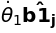

In [2]:
V_01 = (B1['i']).dt(B0)
V_01

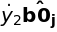

In [3]:
V_02 = (y_2 * B0['j']).dt(B0)
V_02

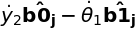

⎡   sin(θ₁)⋅θ₁̇    ⎤
⎢                  ⎥
⎢-cos(θ₁)⋅θ₁̇ + y₂̇⎥
⎢                  ⎥
⎣        0         ⎦

In [4]:
V_12 = V_02 - V_01
V_12
V_12.to_matrix(B0)

**2. Use the fact that $\overrightarrow{V_{12}(M)}$ is on $\overrightarrow{i_{0}(M)}$ to find the relation between $y_2$ and $\theta_1$**

In [5]:
# V_12 is on i0, thus V_12_j0 is zero
# -cos(theta_1) = V_12.i
# y2 = sin(theta_1)

Eq(V_12.to_matrix(B0)[1], 0)
dsolve(V_12.to_matrix(B0)[1], y_2)
Eq(V_12.to_matrix(B0)[0], theta_1)
dsolve(Eq(V_12.to_matrix(B0)[0], theta_1), theta_1)

**3. Differentiate the relation between $y_{2}$ and $\theta_{1}$ to find $\overrightarrow{V_{12}(M)}$**  

In [6]:
func_y_2 = Function('func_y_2')(theta_1)
func_y_2 = dsolve(V_12.to_matrix(B0)[1], y_2).args[1]
diff(func_y_2, t)

# OM.x = e * cos(theta_1) * B0.x
# OM.y = (e * sin(theta_1) + R) * B0.y
# V_12 = OM.x.dt(B0) + OM.y.dt(B0) + 0 * B0.z
# V_12